This is the setup cell

In [1]:
import datetime
import pathlib
import time
import math

import obspy
from obspy.signal import PPSD
import scipy

#%matplotlib #Run this line if you want interactive plots
import matplotlib.pyplot as plt
import numpy as np

import sprit

In [2]:
dPath = r'\\isgs-sinkhole.ad.uillinois.edu\geophysics\HVSR\LakeCalumet\LC_RaspShake\TestDir'
#dPath = r'\\isgs-sinkhole.ad.uillinois.edu\geophysics\HVSR\LakeCalumet\LC_RaspShake\Test12_AM.RAC84.00.2023-02-15_2132-2200.mseed'
trimDir = r'\\isgs-sinkhole.ad.uillinois.edu\geophysics\HVSR\LakeCalumet\LC_RaspShake'

params = sprit.input_param(  acq_date=46,#'2023-02-15',
                            starttime = '21:32:00.00',
                            endtime = '22:00:00.00',
                            tzone = 'UTC',#or 'local', #or 'UTC'
                            dst=False,
                            lon = -88.2290526,
                            lat =  40.1012122,
                            elevation = 755,
                            site = 'HVSR Site',
                            dataPath = dPath
                            )

No metadata file specified!
Using default metadata file for Raspberry Shake v.7 contained in repository at
 c:/Users/balikian/LocalData/CodesScripts/Github/Sprite-HV/resources/raspshake_metadata.inv


In [4]:
params = sprit.get_metadata(params)
stream = sprit.fetch_data(params, source='dir', trim_dir=trimDir)
#stream = hvsr.trim_data(stream, params, export_format='mseed', export_dir=params['dataPath'])
ppsds = sprit.generate_ppsds(params=params, stream=stream, ppsd_length=120, overlap=0.25 )
hvsr_dict = sprit.process_hvsr(params=params, method=4, resample=True, smooth=False)

Day of Year: 46
No trim performed on HVSR Site, please check start/end times.


c:\ProgramData\Anaconda3\envs\seismic38\lib\site-packages\obspy\core\inventory\network.py:249: UserWarning: Found more than one matching response. Returning first.
  warnings.warn(msg)


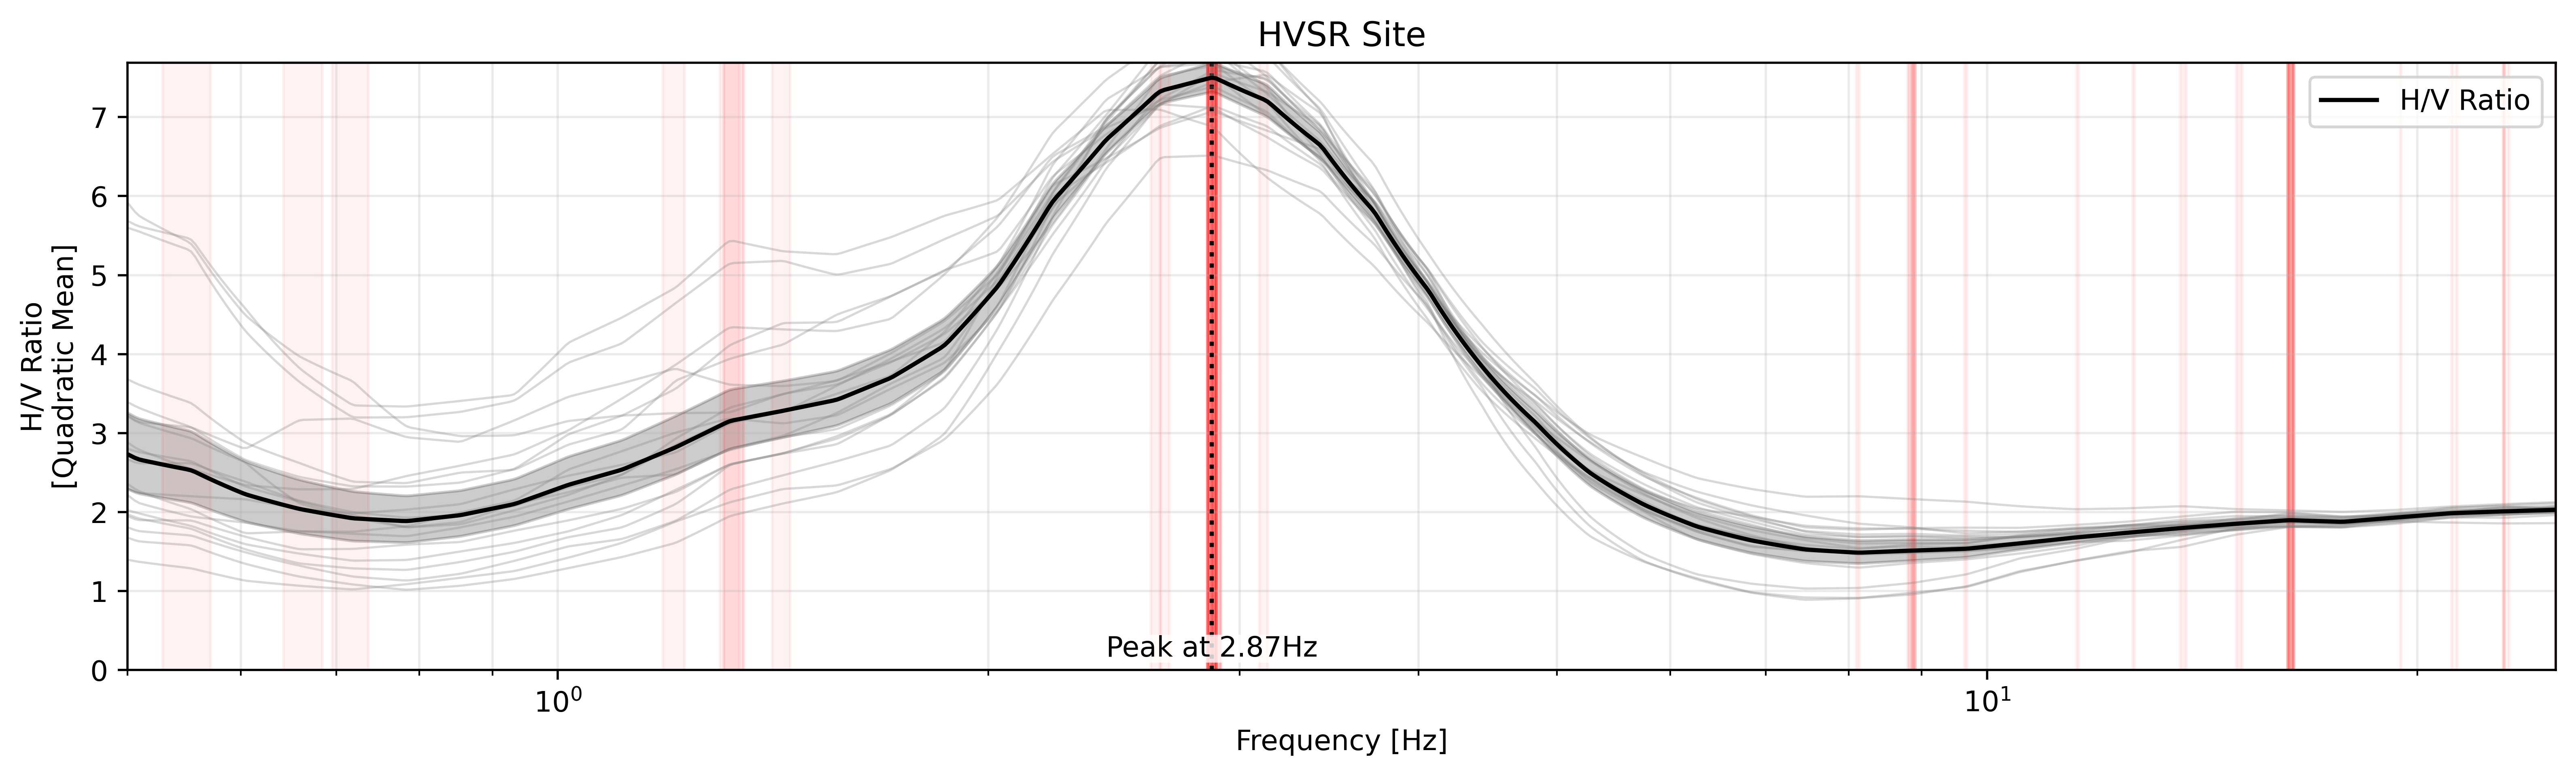

In [6]:
hvsr_dict = sprit.check_peaks(hvsr_dict=hvsr_dict, hvsr_band=[0.5, 25], do_rank=False)
sprit.hvplot(hvsr_dict, kind='HVSR p tp ann', grid='both', show=True)

In [7]:
hvsr_dict['Peak Report']

[{'f0': 16.36163001993691,
  'A0': 1.8963458600483971,
  'f-': 'X',
  'f+': 'X',
  'Sf': 2.673427895529393,
  'Sa': 0.02007992290402443,
  'Score': 2,
  'Report': {'A0': '      1.90 > 2.0 X',
   'P+': '16.248 within ±5% of 16.362 ✔',
   'P-': '16.362 within ±5% of 16.362 ✔',
   'Sf': '    2.6734 < 0.05 * 16.362  X',
   'Sa': '    0.0201 < 0.20 ✔'},
  'Pass List': {'Window Length Freq.': True,
   'Significant Cycles': True,
   'Low Curve StDev. over time': True,
   'Peak Freq. Clarity Below': False,
   'Peak Freq. Clarity Above': False,
   'Peak Amp. Clarity': False,
   'Freq. Stability': True,
   'Peak Stability (freq. std)': False,
   'Peak Stability (amp. std)': True}},
 {'f0': 2.8673779230612007,
  'A0': 7.498062765425931,
  'f-': '     0.721 ✔',
  'f+': '    11.406 ✔',
  'Sf': 3.8309677968810227,
  'Sa': 0.020125471710924856,
  'Score': 5,
  'Report': {'A0': '      7.50 > 2.0 ✔',
   'P+': '2.867 within ±5% of 2.867 ✔',
   'P-': '2.867 within ±5% of 2.867 ✔',
   'Sf': '    3.8310 < 